TransferFunctionDiscrete(
array([ 0.12545199,  0.        , -0.12545199]),
array([ 1.        , -1.67856411,  0.74909601]),
dt: 2.2675736961451248e-05
)


C:\Users\silin\AppData\Local\Temp\ipykernel_12568\4021599990.py:23: RuntimeWarning: divide by zero encountered in log10
  plt.semilogx(w, 20 * np.log10(abs(h)))


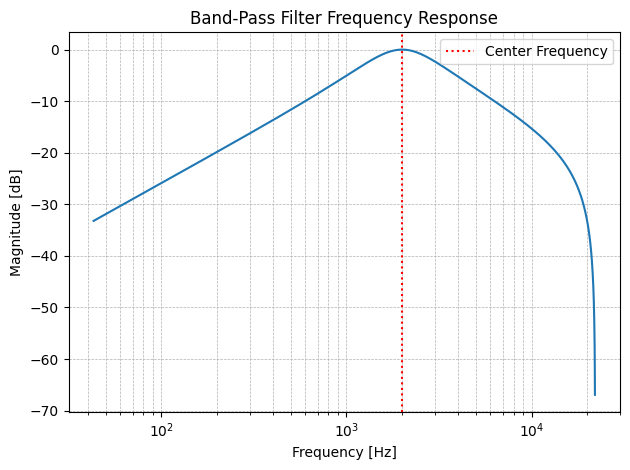

TransferFunctionDiscrete(
array([ 0.00707352,  0.        , -0.00707352]),
array([ 1.        , -1.90577389,  0.98585296]),
dt: 2.2675736961451248e-05
)


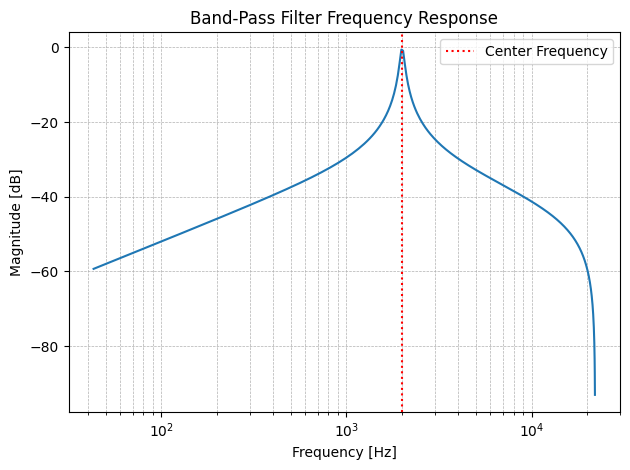

TransferFunctionDiscrete(
array([ 0.00354927,  0.        , -0.00354927]),
array([ 1.        , -1.91253816,  0.99290146]),
dt: 2.2675736961451248e-05
)


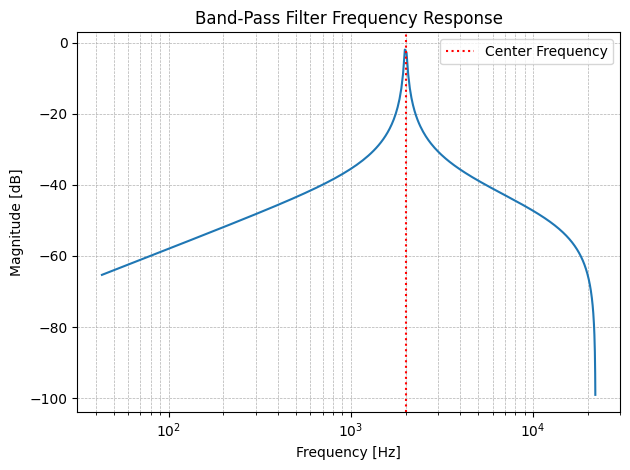

TransferFunctionDiscrete(
array([ 0.00071187,  0.        , -0.00071187]),
array([ 1.        , -1.91798412,  0.99857626]),
dt: 2.2675736961451248e-05
)


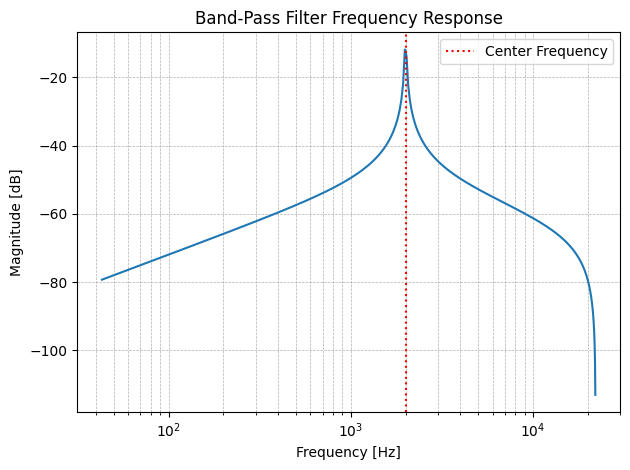

TransferFunctionDiscrete(
array([ 0.00014246,  0.        , -0.00014246]),
array([ 1.        , -1.91907703,  0.99971509]),
dt: 2.2675736961451248e-05
)


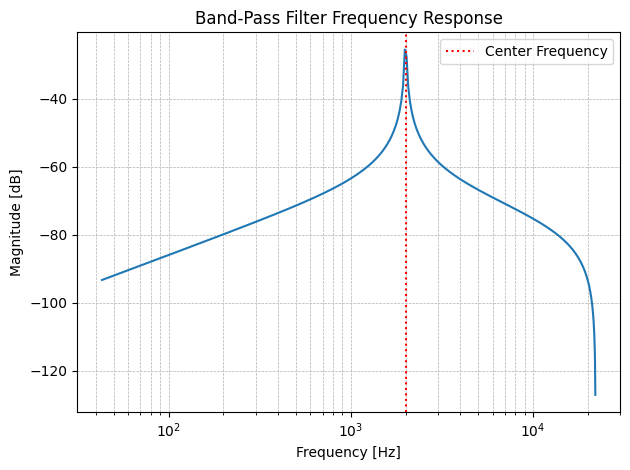

In [4]:
import numpy as np
from scipy.signal import iirpeak, freqz, TransferFunction
import matplotlib.pyplot as plt

# Parameters
fs = 44100            # Sampling rate (Hz)
f0 = 2000            # Center frequency (Hz)
qlist=[1,20,40,200,1000]              # Quality factor
# intensity=1.0

for Q in qlist:
    # Design band-pass filter using iirpeak (biquad)
    b, a = iirpeak(w0=f0/(fs/2), Q=Q)  # Normalized frequency (f0 / Nyquist)
    # b=intensity * b
    # Optional: Create TransferFunction object (discrete system)
    # Note: 'dt=1/fs' makes it a discrete-time system
    tf = TransferFunction(b, a, dt=1/fs)

    print(tf)

    # Frequency response plot  ... Bode
    w, h = freqz(b, a, fs=fs)
    plt.semilogx(w, 20 * np.log10(abs(h)))
    plt.title('Band-Pass Filter Frequency Response')
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Magnitude [dB]')
    plt.grid(which='both', linestyle='--', linewidth=0.5)
    plt.axvline(f0, color='red', linestyle=':', label='Center Frequency')
    plt.legend()
    plt.tight_layout()
    plt.show()
